In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms
from rdkit.Chem import rdMolAlign
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import copy

In [2]:
scaf = Chem.MolFromSmiles('c1cc(C)ccc1')
AllChem.Compute2DCoords(scaf)
scaf
tm = np.zeros((4,4), np.double)
for i in range(3):
    tm[i,i] = 0.1

In [3]:
rdMolTransforms.TransformConformer(scaf.GetConformer(), tm)

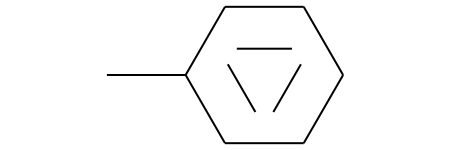

In [4]:
scaf

In [5]:
writer = Chem.SDWriter('scaf.sdf')
writer.write(scaf)
writer.close()

In [6]:
mol = Chem.MolFromSmiles('Nc1ccc(C)cc1')

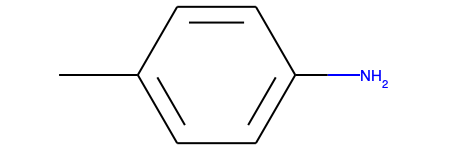

In [7]:
mol

In [8]:
scaf = Chem.SDMolSupplier('scaf.sdf')[0]

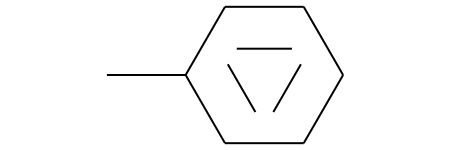

In [9]:
scaf

In [10]:
def bondnormalize(mol, temp):
    AllChem.Compute2DCoords(mol)
    ref_bond = mol.GetBonds()[0]
    ref_length = rdMolTransforms.GetBondLength(mol.GetConformer(), ref_bond.GetBeginAtomIdx(),ref_bond.GetEndAtomIdx() )
    prob_bond = temp.GetBonds()[0]
    prob_length = rdMolTransforms.GetBondLength(temp.GetConformer(), prob_bond.GetBeginAtomIdx(),prob_bond.GetEndAtomIdx() )
    ratio = ref_length / prob_length
    tm = np.zeros((4,4), np.double)
    for i in range(3):
        tm[i,i] = ratio
    rdMolTransforms.TransformConformer(temp.GetConformer(), tm)
    AllChem.GenerateDepictionMatching2DStructure(mol, temp)
    return mol
    

In [11]:
cpmol = copy.deepcopy(mol)

In [12]:
AllChem.GenerateDepictionMatching2DStructure(cpmol, scaf)

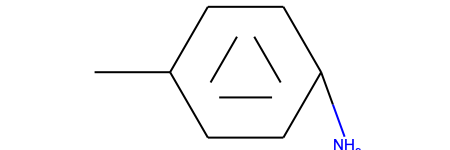

In [13]:
cpmol

In [14]:
m=bondnormalize(mol, scaf)

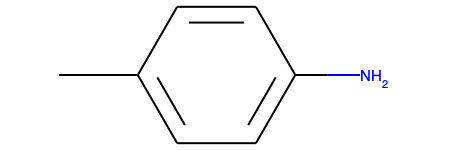

In [15]:
m